## Final Project Submission

Please fill out:
* Student name: Joshua Thomas
* Student pace: self paced / *part time* / full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


### Importing the Required Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import quickfunctions as qf
from sklearn.model_selection import train_test_split #Split the data into test/train portions and fit model to smaller sample
from mpl_toolkits.mplot3d import Axes3D

### Load the dataset and perform initial analysis
In this dataset, there are 20 different columns (potential features) to build a model from.

In [2]:
housing_data = pd.read_csv('kc_house_data.csv')
housing_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
housing_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Quick Notes on Data Set
* Waterfront has some NaN and zero values, will want to convert these to binary values.
* May want to drop lat/long when building the model.
* See if there is a data dictionary for this data set.
* May want transform zipcode into categorical data type.

* Will want to categorize 'condition, grade, floors' columns. 
* May want to categorize Year Column into different decades.
* Will want to convert sqft_basement to float
* Will want to convert any column that doens't necessarily need to be a float to an integer
* Drop ID's in data set to avoid skewing model.
* There are some columns that are of the 'object' data type. Cast these appropriately
* Convert appropriate values to integers

In [4]:
housing_data.info()
# housing_data.drop('id', axis=1, inplace=True) #Column has been dropped. Reimport data if needed again.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


* For the Waterfront Column, set NaN values to zero to signify that there is no water front.
* For View, also set NaN columns equal to zero.
    * Can accomplish this using _pd.fillna()_ or writing for loop to iterate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000200673AF0F0>,
      dtype=object)

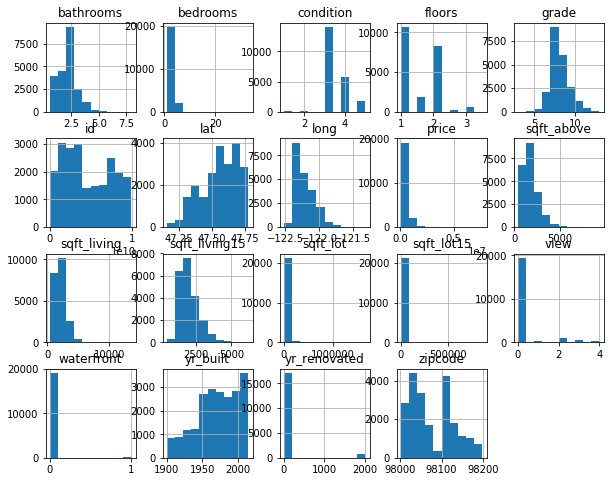

In [5]:
features = housing_data.columns
housing_data[features].hist(figsize=(10,8), layout=(4,5))

### Cleaning the Data
Start with evaluating which variables can be transformed into categorical
* Converted Waterfront and Grade.
* Working to use this data for modeling a general price estimate of houses given the features.
* Filling Waterfront, view NaN's with zeros 

In [6]:
housing_data['waterfront'].fillna(0, inplace=True)
housing_data['view'].fillna(0, inplace=True)
housing_data['price'] = housing_data['price'].astype(int)

waterfront_cat = pd.get_dummies(housing_data['waterfront'], prefix='waterfront')
view_cat = pd.get_dummies(housing_data['view'], prefix='view')
grade_cat = pd.get_dummies(housing_data['grade'], prefix='grade')
bath_cat = pd.get_dummies(housing_data['bathrooms'], prefix='bath')
floors_cat = pd.get_dummies(housing_data['floors'], prefix='floor')
bed_cat = pd.get_dummies(housing_data['bedrooms'], prefix='bed')
zip_cat = pd.get_dummies(housing_data['zipcode'], prefix='zip')
cond_cat = pd.get_dummies(housing_data['condition'], prefix='cond')
yr_cat = pd.get_dummies(housing_data['yr_built'], prefix='yr')

housing_data = pd.concat([housing_data, waterfront_cat, grade_cat, view_cat, bath_cat, floors_cat, bed_cat, zip_cat, cond_cat], axis=1)
housing_data.set_index(keys='id')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,cond_1,cond_2,cond_3,cond_4,cond_5
id,,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,1,0,0,0,0,0,1,0,0
6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,0,0,0,1
1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
7237550310,5/12/2014,1230000,4,4.50,5420,101930,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
1321400060,6/27/2014,257500,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0
2008000270,1/15/2015,291850,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0,0,0,1,0,0,0,1,0,0
2414600126,4/15/2015,229500,3,1.00,1780,7470,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,1,0,0


### Scaling and Normalizing Features
Features to Scale/Normalize: Sq.Ft, Price

In [7]:
scaled_price = np.log(housing_data['price'])
price = housing_data['price']
condition = np.log(housing_data['condition'])
scaled_living = np.log(housing_data['sqft_living'])
scaled_lot = np.log(housing_data['sqft_lot'])
scaled_above = np.log(housing_data['sqft_above'])

### Taking a look at correlation
* Checking which features have high correlation, looking specifically in my case at the price column for modeling
* Write function to automatically return true values
* Function to get correlations is built in QuickFuncs package/module

### Extracting Price-related Features
* Extracted highly correlated variables
* Check distrbutions of features
* Check for multicollinearity in features
* See if any features need to be adjusted.

In [45]:
features = pd.DataFrame([], index=[])
features['scaled_living'] = scaled_living
features['scaled_lot'] = scaled_lot
# features['condition'] = condition
features = pd.concat([features, zip_cat, waterfront_cat, yr_cat, cond_cat, bed_cat], axis=1)
#Normalize/Scale features for prices
#Grades need to be turned in to Categorical Variable
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 207 entries, scaled_living to bed_33
dtypes: float64(2), uint8(205)
memory usage: 4.6 MB


### Begin Modeling Data

In [46]:
features_const = sm.add_constant(features)
model = sm.OLS(scaled_price, features_const).fit()

C:\Users\Jthom\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     617.9
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        21:07:19   Log-Likelihood:                 3962.3
No. Observations:               21597   AIC:                            -7519.
Df Residuals:                   21394   BIC:                            -5899.
Df Model:                         202                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.0070      0.028    143.858      0.000       3.952       4.062
scaled_living      0.6750      0.005    123.901      0.000       0.664       0.686
scaled_lot         0.1015      0.002     43.067      0.000       0.097       0.106
zip_98001         -0.4810      0.011    -44.815      0.000      -0.502      -0.460
zip_98002         -0.4977      0.014    -34.651      0.000      -0.526      -0.470
zip_98003         -0.3992      0.012    -32.822      0.000      -0.423      -0.375
zip_98004          0.7912      0.012     68.191      0.000       0.768       0.814
zip_98005          0.3810      0.016     24.227      0.000       0.350       0.412
zip_98006          0.3285      0.009     35.121      0.000       0.310       0.347
zip_98007          0.2895      0.017     16.923      0.000       0.256       0.323
zip_98008          0.2924      0.012     23.747      0.000       0.268       0.317
zip_98010         -0.2827      0.020    -13.891      0.000      -0.323      -0.243
zip_98011          0.0138      0.014      0.954      0.340      -0.015       0.042
zip_98014         -0.2354      0.018    -12.754      0.000      -0.272      -0.199
zip_98019         -0.2077      0.015    -14.006      0.000      -0.237      -0.179
zip_98022         -0.4311      0.014    -31.888      0.000      -0.458      -0.405
zip_98023         -0.4421      0.009    -47.628      0.000      -0.460      -0.424
zip_98024         -0.0882      0.023     -3.867      0.000      -0.133      -0.043
zip_98027          0.0803      0.010      7.920      0.000       0.060       0.100
zip_98028         -0.0257      0.012     -2.133      0.033      -0.049      -0.002
zip_98029          0.2081      0.012     17.993      0.000       0.185       0.231
zip_98030         -0.4246      0.013    -33.447      0.000      -0.450      -0.400
zip_98031         -0.3811      0.012    -30.871      0.000      -0.405      -0.357
zip_98032         -0.4439      0.018    -24.560      0.000      -0.479      -0.408
zip_98033          0.3999      0.010     40.747      0.000       0.381       0.419
zip_98034          0.1377      0.009     15.337      0.000       0.120       0.155
zip_98038         -0.3290      0.009    -37.824      0.000      -0.346      -0.312
zip_98039          1.0250      0.028     36.002      0.000       0.969       1.081
zip_98040          0.5982      0.012     48.624      0.000       0.574       0.622
zip_98042         -0.4025      0.009    -45.028      0.000      -0.420      -0.385
zip_98045         -0.1666      0.014    -11.985      0.000      -0.194      -0.139
zip_98052          0.2374      0.009     27.361      0.000       0.220       0.254
zip_98053          0.1074      0.011     10.190      0.000       0.087       0.128
zip_98055         -0.3003      0.012    -24.297      0.000      -0.324      -0.276
zip_98056   

### Details on Model
* 85% Confidence on predicting home prices in data set.
* Features selected are: Year(Categorical), Waterfront(Categorical), Zipcode(Categorical), Condition(Categorical)
    * Living Sq Ft(Numerical), Lot Size(Numerical)
* Features and data type were chosen by best interpretation of the data. Data casted as numerical was selected because the data implies that "more is better" in the fact that SQ Footage of Living/Lot Size and Higher Condition equated with higher costs.
* Features with ambiguous data(Waterfront) were set equal to 0 or 1 to signify that the potential house has a waterfront view.
    * This information could be misleading from looking at the model because some information was lost flattening to binary values.
* Zip Code appeared to have a large impact on the model.
        * Average condition of the houses in a particular Zip Code did not necessarily correlate with higher prices
        * Average Lot Size of a Zip code 

(array([ 852.,  867., 1163., 1235., 2710., 2936., 2805., 2582., 2856.,
        3591.]),
 array([1900. , 1911.5, 1923. , 1934.5, 1946. , 1957.5, 1969. , 1980.5,
        1992. , 2003.5, 2015. ]),
 <a list of 10 Patch objects>)

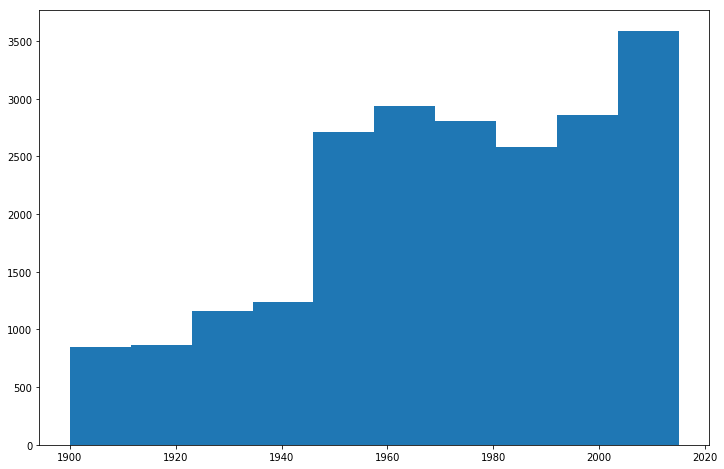

In [48]:
est_price = list(model.predict())
plt.figure(figsize=(12,8))
plt.hist(housing_data['yr_built'])

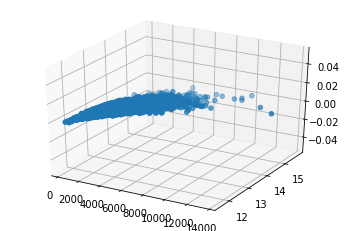

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(housing_data['sqft_living'], est_price)

## Visualizing Important Features for Price Prediction Model

In [50]:
# 5 Most Expensive Zip Code??
# Average cost per house condition?
# Best Zip Code to look for housing
# "Oldest" Zip Code

zip_count = pd.Series(list(housing_data[zip_cat.columns].sum()), name='count')
#Extracting home count per zip code. Order is preserved from categorical casting

In [51]:
zip_price = pd.DataFrame(housing_data.groupby(['zipcode'])['price'].mean().astype(int))
zip_price.reset_index(inplace=True) #Took a couple hours to fix this.... 
zip_price = pd.concat([zip_price,zip_count], axis=1)
zip_price.sort_values('price', ascending=False)

,zipcode,price,count
24,98039,2161300,50
3,98004,1356523,317
25,98040,1194873,282
48,98112,1096239,269
41,98102,899607,104
47,98109,880077,109
43,98105,863228,229
5,98006,859938,498
53,98119,849714,184
4,98005,810289,168


In [52]:
zip_cond = pd.DataFrame(housing_data.groupby(['zipcode'])['sqft_living', 'sqft_lot', 'price'].mean().astype(int))
zip_cond.sort_values('price', ascending=False)

,sqft_living,sqft_lot,price
zipcode,,,
98039,3800,17403,2161300
98004,2909,13104,1356523
98040,3106,13704,1194873
98112,2498,4990,1096239
98102,2151,3605,899607
98109,2054,3621,880077
98105,2150,5121,863228
98006,2888,13383,859938
98119,2005,3615,849714


In [ ]:
#Build in Stepwise Feature Selection to evaluate model here